In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Coefficient: 0.0959
Intercept: 250.9276
Mean Squared Error: 2570.34
Root Mean Squared Error: 50.70
R-squared Score: 0.4739


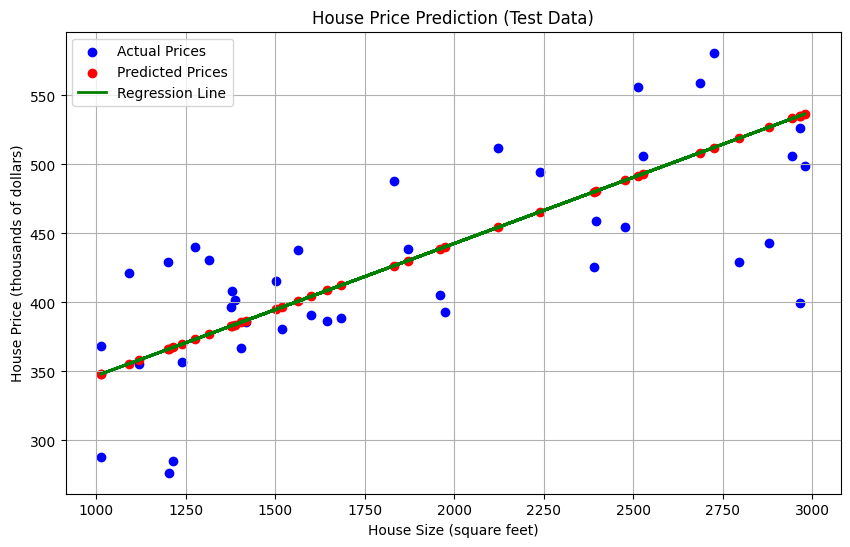

In [2]:
# Seed per risultati ripetibili
np.random.seed(42)
n_samples = 200

# Dati originali (size e price)
house_sizes = np.random.randint(1000, 3000, n_samples)

# Numero di finestre, senza usarlo come regressore
n_windows = np.random.randint(3, 8, n_samples)

# Prezzo della casa (aggiungiamo il contributo di n_windows, ma non lo usiamo come regressore)
house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15 * n_windows

# Crea il DataFrame
data = pd.DataFrame({
    'Size': house_sizes,
    'Price': house_prices
})

# Visualizza i primi 5 record
data.head()

# Suddividi i dati
X = data[['Size']]  # Solo 'Size' come regressore
y = data['Price']   # Target 'Price'

# Suddivisione dei dati in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Costruzione del modello
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficiente (pendenza) e intercetta del modello
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Predizioni sul test set
y_pred = model.predict(X_test)

# Calcolare l'errore quadratico medio (MSE) e il root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Calcolare il coefficiente di determinazione R^2
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualizzare i dati originali e le previsioni
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.title('House Price Prediction (Test Data)')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.legend()
plt.grid(True)
plt.show()

- Anche se ho modificato la formula per includere n_windows nel calcolo di house_prices, nella parte di regressione ho mantenuto solo house_sizes come regressore.

-La relazione tra le dimensioni della casa e il prezzo della casa è rimasta invariata, ma ora ci sarà un piccolo cambiamento nei prezzi effettivi delle case a causa dell'aggiunta di n_windows nel calcolo di house_prices. Tuttavia, questo cambiamento non verrà catturato dal modello di regressione lineare in quanto stiamo utilizzando solo house_sizes come regressore.

## Adattamento del notebook per usare sia house_sizes che n_windows come regressori

In [3]:
# Includiamo 'n_windows' come regressore
data['Windows'] = n_windows

# Definiamo le features (entrambi 'Size' e 'Windows') e il target (Price)
X = data[['Size', 'Windows']]  # Aggiungiamo anche 'Windows'
y = data['Price']  # Target 'Price'

# Suddivisione dei dati in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Costruzione del modello con due regressori
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficiente e intercetta del modello
print(f"Coefficient for Size: {model.coef_[0]:.4f}")
print(f"Coefficient for Windows: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Equation: y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Size + {model.coef_[1]:.4f} * Windows")

# Predizioni sul test set
y_pred = model.predict(X_test)

# Calcolare l'errore quadratico medio (MSE) e il root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Calcolare il coefficiente di determinazione R^2
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Coefficient for Size: 0.0949
Coefficient for Windows: 12.4270
Intercept: 192.4216
Equation: y = 192.4216 + 0.0949 * Size + 12.4270 * Windows
Mean Squared Error: 2456.97
Root Mean Squared Error: 49.57
R-squared Score: 0.4971


- Ora uso due regressori: house_sizes e n_windows. Questo dovrebbe teoricamente migliorare le previsioni, poiché includiamo più variabili che influenzano il prezzo della casa.

- Il coefficiente associato a n_windows mostrerà l'influenza di questo fattore sul prezzo delle case, mentre house_sizes rimarrà il fattore principale.

### Visualizzare gli output della regressione lineare con 2 regressori

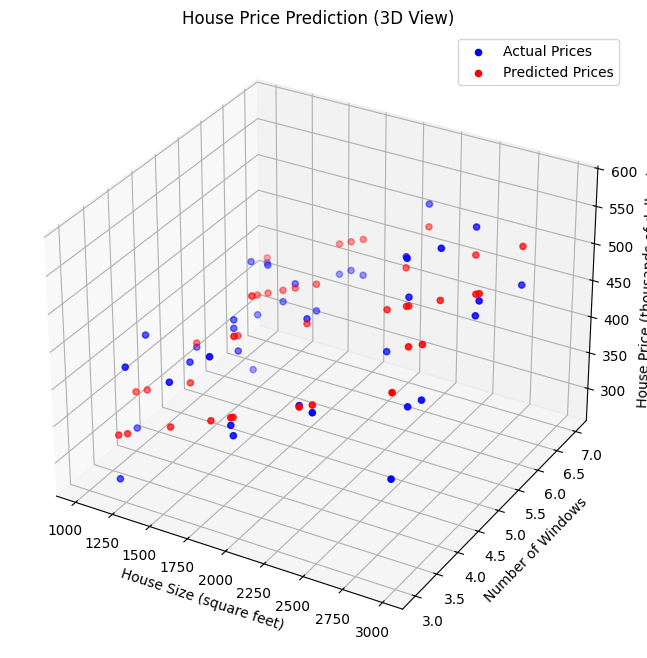

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Predizioni per il grafico 3D
x_vals = X_test['Size'].values
w_vals = X_test['Windows'].values
y_vals = y_test.values
y_pred_vals = y_pred

# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafico dei dati reali
ax.scatter(x_vals, w_vals, y_vals, color='blue', label='Actual Prices')

# Grafico delle predizioni
ax.scatter(x_vals, w_vals, y_pred_vals, color='red', label='Predicted Prices')

ax.set_xlabel('House Size (square feet)')
ax.set_ylabel('Number of Windows')
ax.set_zlabel('House Price (thousands of dollars)')
ax.set_title('House Price Prediction (3D View)')
ax.legend()

plt.show()


C:\Users\franc\PycharmProjects\DataScience\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


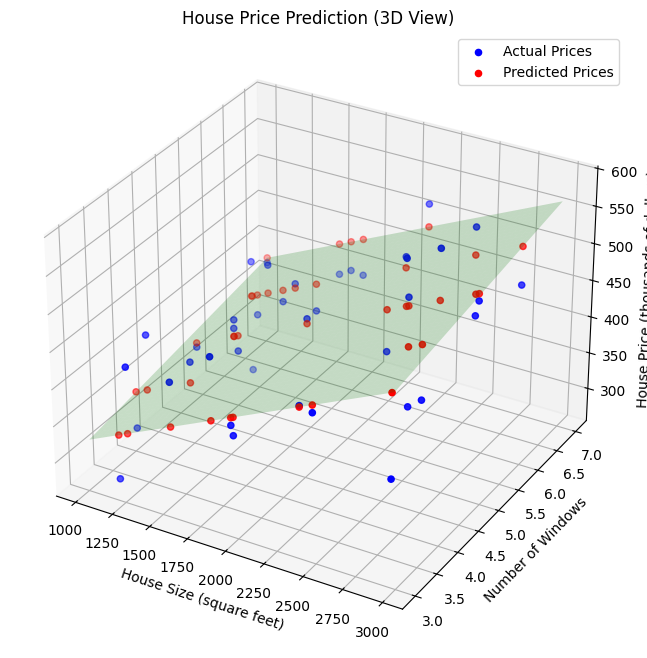

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che 'model' sia il tuo modello di regressione addestrato

# Predizioni per il grafico 3D
x_vals = X_test['Size'].values
w_vals = X_test['Windows'].values
y_vals = y_test.values
y_pred_vals = y_pred

# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafico dei dati reali
ax.scatter(x_vals, w_vals, y_vals, color='blue', label='Actual Prices')

# Grafico delle predizioni
ax.scatter(x_vals, w_vals, y_pred_vals, color='red', label='Predicted Prices')

# Creare una griglia di punti per la superficie
size_range = np.linspace(X_test['Size'].min(), X_test['Size'].max(), 50)
windows_range = np.linspace(X_test['Windows'].min(), X_test['Windows'].max(), 50)
size_grid, windows_grid = np.meshgrid(size_range, windows_range)

# Calcolare le predizioni per ciascun punto della griglia
predicted_prices = model.predict(np.c_[size_grid.ravel(), windows_grid.ravel()]).reshape(size_grid.shape)

# Aggiungere la superficie di regressione
ax.plot_surface(size_grid, windows_grid, predicted_prices, color='green', alpha=0.2)

# Etichette e titolo
ax.set_xlabel('House Size (square feet)')
ax.set_ylabel('Number of Windows')
ax.set_zlabel('House Price (thousands of dollars)')
ax.set_title('House Price Prediction (3D View)')
ax.legend()

plt.show()


### uso un grafico 2d

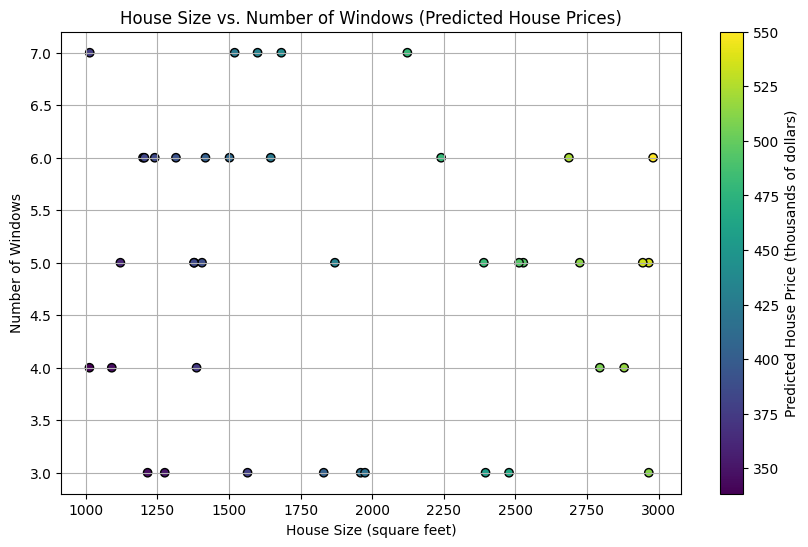

In [6]:
# Grafico 2D con colori
plt.figure(figsize=(10, 6))

# Creiamo un grafico scatter in cui il colore rappresenta i prezzi
scatter = plt.scatter(X_test['Size'], X_test['Windows'], c=y_pred, cmap='viridis', edgecolor='k')

# Aggiungi una barra dei colori per i prezzi
plt.colorbar(scatter, label='Predicted House Price (thousands of dollars)')

# Titoli e etichette
plt.title('House Size vs. Number of Windows (Predicted House Prices)')
plt.xlabel('House Size (square feet)')
plt.ylabel('Number of Windows')
plt.grid(True)
plt.show()


Il grafico mostra come i prezzi previsti cambiano in funzione delle dimensioni della casa (asse X) e del numero di finestre (asse Y).
I colori nei punti del grafico rappresentano il prezzo previsto per ogni combinazione di dimensioni della casa e numero di finestre.